<a href="https://colab.research.google.com/github/hrbae/Industrial_Data_Science/blob/main/Code/14_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강화학습의 이해

* 주어진 환경과 상호작용하여 좋은 점수를 얻는 방향으로 성장하는 머신러닝 분야를 '강화학습(reinforcement learning)'이라고 정의함

> 1. 최근에는 알고리즘이 **신경망**의 조합과 함께 발전함에 따라 진자 문제와 같은 보다 복잡한 작업을 해결할 수 있게 되었음

> 2. 강화학습은 크게 상태(state), 에이전트(agent), 행동(action), 보상(reward) 4가지 요소로 나눌 수 있음




 1. Policy: Agent의 행동 패턴을 의미
 * 주어진 환경(state)에서 어떤 행동(action)을 취할지 결정하는 함수로써, 환경(state)을 행동(action)에 연결 짓는 함수
 * Policy는 크게 deterministic(결정적) policy와 stochastic(확률적) policy로 구분

---
Deterministic policy는 주어진 환경(state)에 대해 하나의 행동(action)을 할당하고, stochastic policy는 주어진 환경(state)에 대해 행동(action)들의 확률 분포를 할당함

---

2. Value function: 환경(State)과 행동(action)이 나중에 어느 정도의 보상(reward)을 돌려줄지에 대한 예측 함수 
* 해당 환경(state)과 행동(action)을 취했을 때 이후에 받을 모든 보상(reward)들의 가중합
* 뒤에 받을 보상(reward) 보다 먼저 받을 보상(reward)에 대한 선호를 나타내기 위해 discounting factor λ를 사용

3. Model: 환경(state)과 보상(reward)이 어떨지에 대한 agent의 예상으로 State model과 Reward model로 구분 할 수 있음

# 강화학습 알고리즘의 구분
1. Model-Free vs Model-Based

* 강화학습 알고리즘을 구분은 첫번째 구분은 environment에 대한 model의 존재 여부에 따라 달라지며, 각각 장단점이 있음

* Model을 갖는 것의 장점은 Planning(계획)을 가능하게 함. 즉, 자신의 행동(action)에 따라서 environment가 어떻게 바뀔지 안다면 실제로 행동하기 전에 미리 변화를 예상해보고 최적의 행동을 계획하여 실행할 수 있으며, 이와 같은 계획이 가능하다면 agent는 훨씬 효율적으로 행동할 수 있음

* Model을 갖는 것의 단점은 environment의 정확한 model은 보통 알아내기가 어렵거나 불가능하다는 점임. 혹시라도 Model이 environment를 제대로 반영하지 않는다면 이 오류는 그대로 agent의 오류로 이어지게 되며, 정확한 model을 만드는 것은 좋은 agent를 만드는 것만큼 또는 더 어려울 수 있음

* Model을 사용하는 agent를 model-based라고 부르고 그렇지 않은 agent를 model-free라고 부르며, Model-based agent는 다시 모델이 주어져 있는지 아니면 학습 대상인지에 따라 구분할 수 있음

2. Value-Based vs Policy-Based (On-Policy vs Off-Policy)

* Value function이 완벽하다면 최적의 policy는 자연스럽게 얻을 수 있게 됨. 즉, 각 state에서 가장 높은 value를 주는 행동(action)만을 선택하면 될것이며 이를 implicit (암묵적인) policy라고 함.
 
  ---
  * Value function 만을 학습하고 policy는 암묵적으로만 갖고 있는 알고리즘들이 있으며, 이를 value-based agent라고 정의함 (ex: DQN)
  * Value-based agent는 데이터를 더 효율적으로 활용할 수 있다는 장점이 있음

  ---

* Value function은 policy를 만들기 위해 사용되는 중간 계산일 뿐이기 때문에, Policy가 완벽하다면 value function은 굳이 필요하지 않음

  ---
  * Value function이 없이 policy만을 학습하는 agent를 policy-based라고 부릅니다. Policy Gradient 등이 여기에 해당
  * Policy-based agent는 원하는 것에 직접적으로 최적화를 하기 때문에 더욱 안정적으로 학습된다는 장점이 있음

  ---

* Value function과 Policy를 모두 갖고 있는 agent도 있습니다. 이를 Actor-Critic agent라고 부릅니다.

* 강화학습의 종류

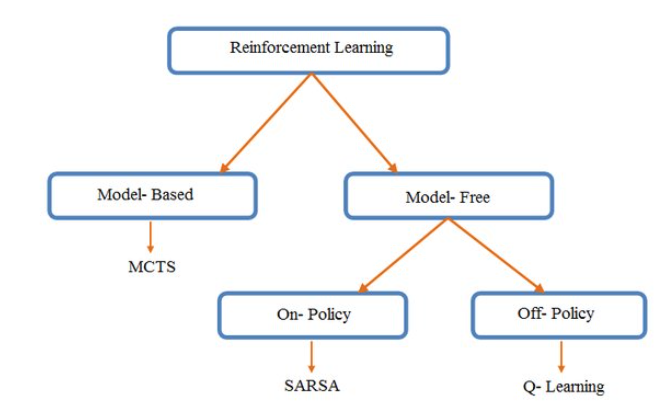

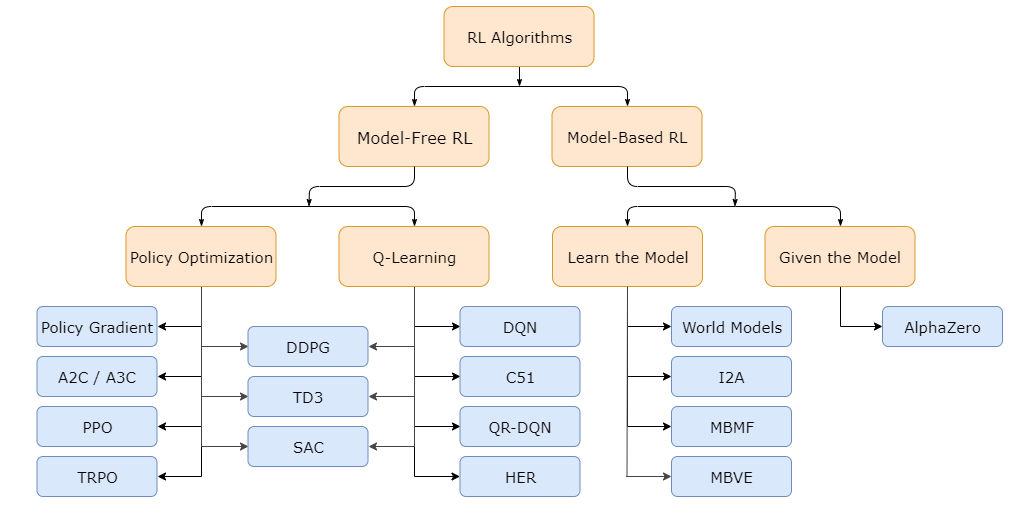

# 강화학습의 구현

* xvfb: 이미지 캡처에 필요한 라이브러리
* python-opengl: "Open Graphics Library"를 이용하기 위한 라이브러리
* gym: 다양한 게임환경 및 강화학습 환경을 제공해주는 라이브러리

https://www.gymlibrary.ml/environments/atari/ 

* pyvirtualdisplay: xvfb를 위한 파이썬 wrapper
* piglet: Fast Python Template Engine

In [ ]:
!apt install xvfb -y
!pip install gym
!apt-get install python-opengl -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 2s (381 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [ ]:
# 디스플레이 환경 셋팅
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
%matplotlib inline

In [ ]:
# 필요한 라이브러리 호출
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Replay memory 구현을 위한 라이브러리
from collections import namedtuple
from itertools import count

from PIL import Image
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


env = gym.make('CartPole-v1').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

1. MCTS: Monte Carlo Tree Search

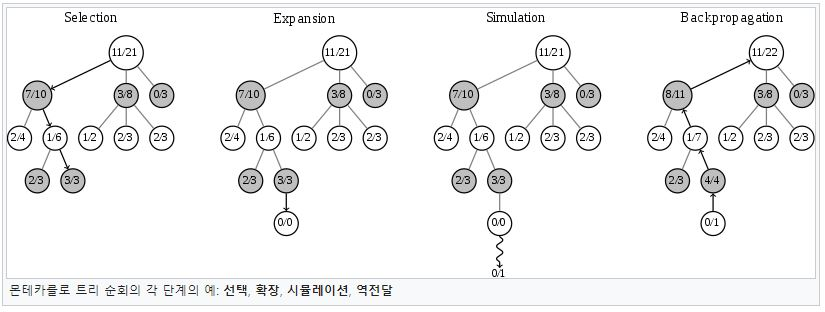

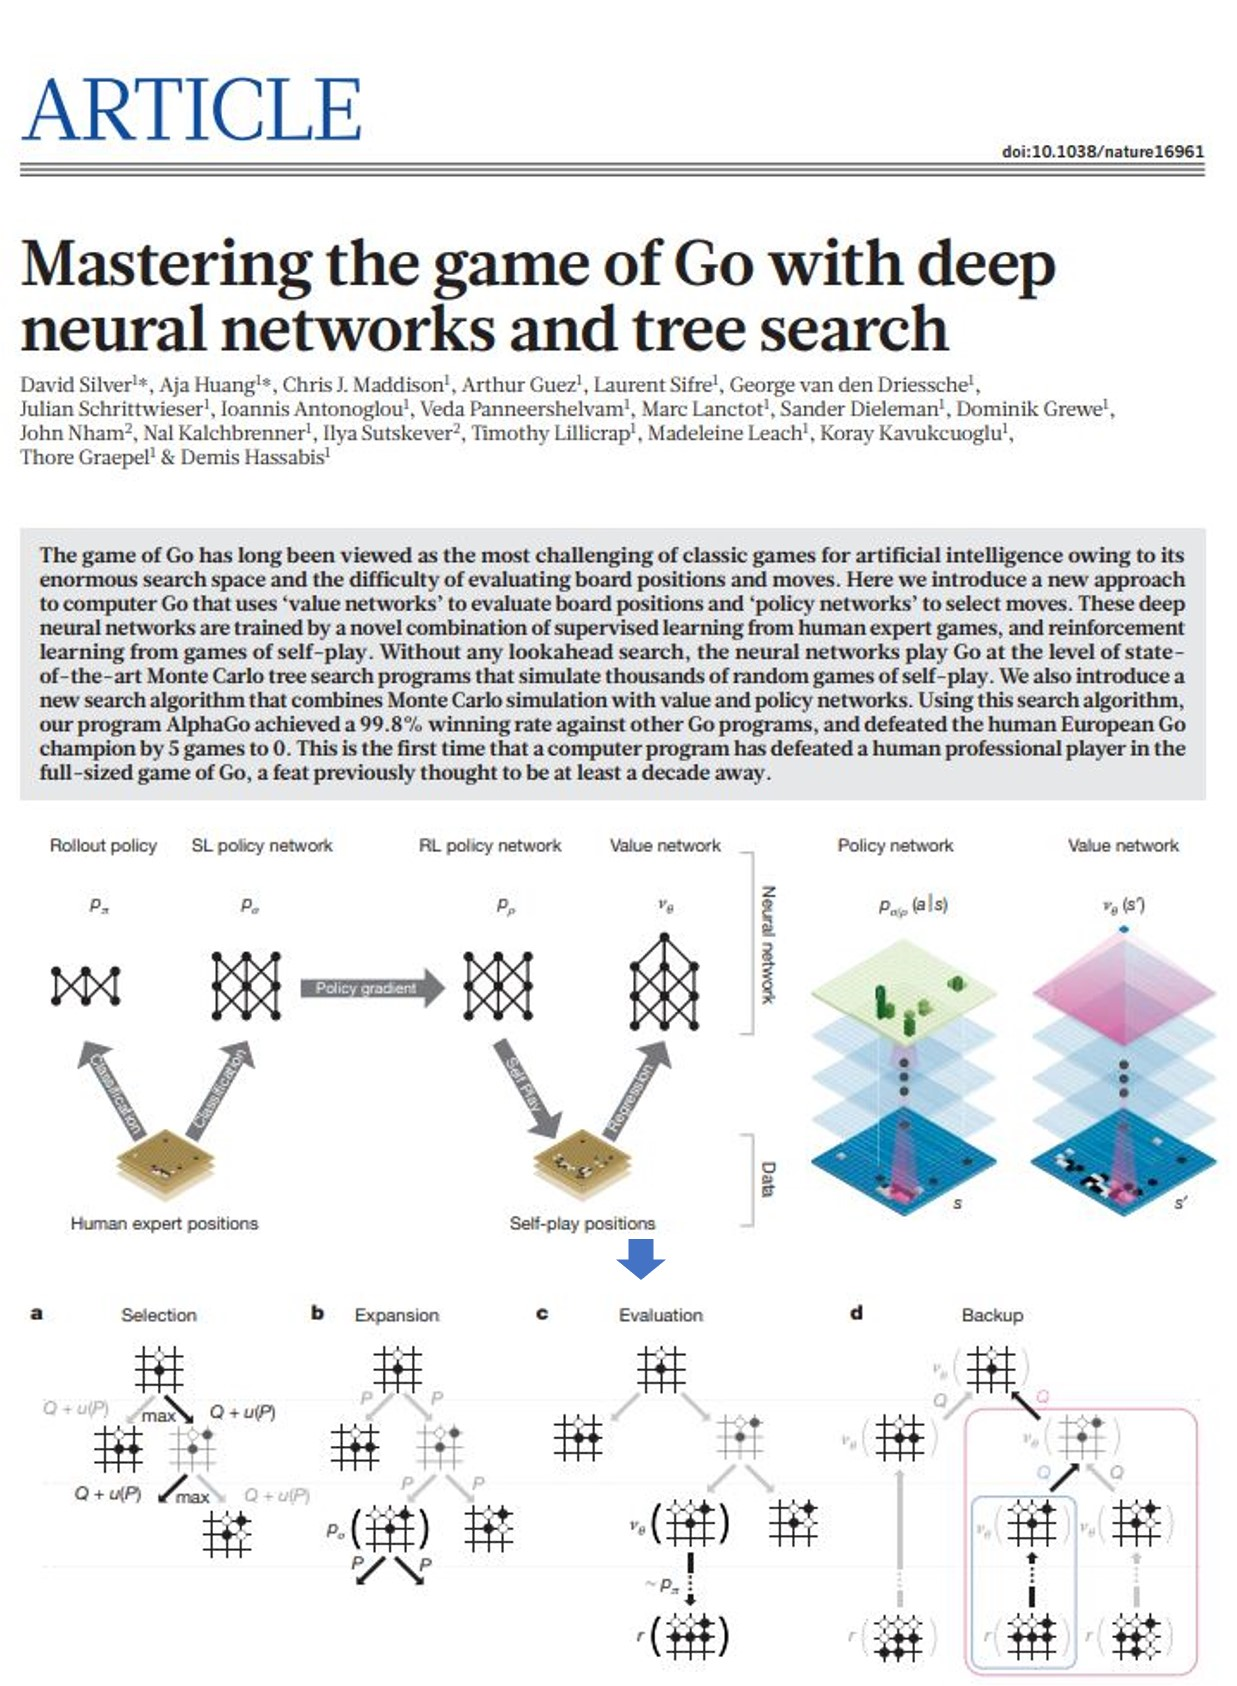

2. SARSA (State–Action–Reward–State–Action)


[참고자료](https://www2.slideshare.net/DongMinLee32/part-2-91522217)

In [ ]:

state = env.reset()
action = env.action_space.sample()

print('State space: ', env.observation_space)
print('Initial state: ', state)
print('\nAction space: ', env.action_space)
print('Random action: ', action)


State space:  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Initial state:  [-0.00200905  0.03651781  0.02891576  0.00085548]

Action space:  Discrete(2)
Random action:  1


액션 (Action): 'CartPole'에서는 2개의 액션이 존재한다. 그리고 각각의 액션이 번호로 지정 되어 있다.

$A = \{0, 1\}$   

Num	| Action
----|----
0 |	Push cart to the left
1 |	Push cart to the right


상태 (State): 'CartPole'의 상태(State) $S$는 4개의 실수값의 배열로 되어 있다.   

$S = \begin{bmatrix}
\{ s_{00}, s_{01}, \cdots\}, \\
\{ s_{10}, s_{11}, \cdots \}, \\
\{ s_{20}, s_{21}, \cdots \}, \\
\{ s_{30}, s_{31}, \cdots \}
\end{bmatrix}$  

Index | State                   | Min      | Max
-----|-----------------|--------|------
0      | Cart Position       | -4.8    | 4.8  
1       | Cart Velocity       | -Inf     | Inf
2      | Pole Angle           | -24 deg | 24 deg
3      | Pole Velocity At Tip | -Inf     | Inf



> 4종류의 상태값 중에 하나가 0.0000001만 바뀌어도 상태가 바뀐다.  

보상 (Reward): 매 스텝(step)마다 +1을 보상 받는다. 종료 스텝(termination step)에도 +1을 보상 받음

> 오래 버티면 높은 점수를 획득함


종료 조건:
1. 막대의 각도가 ±12° 보다 커질 경우

2. 카트가 벽을 넘어가려고 하는 경우

3. 에피소드 길이가 길어져서 500을 넘어갈 경우


3. Q-Learning

> [DQN](https://www.youtube.com/watch?v=rQIShnTz1kU)

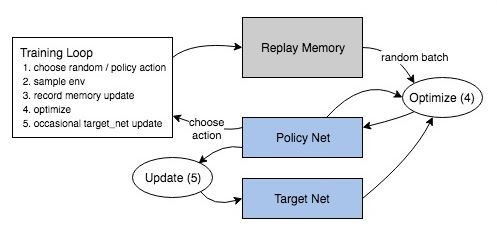

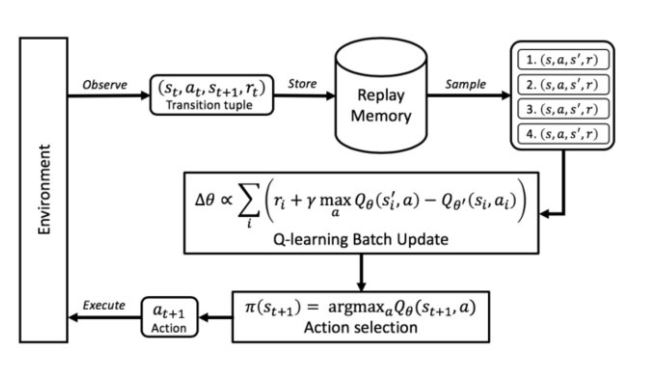

In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


# 리플레이 메모리 
class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

* Namedtuple

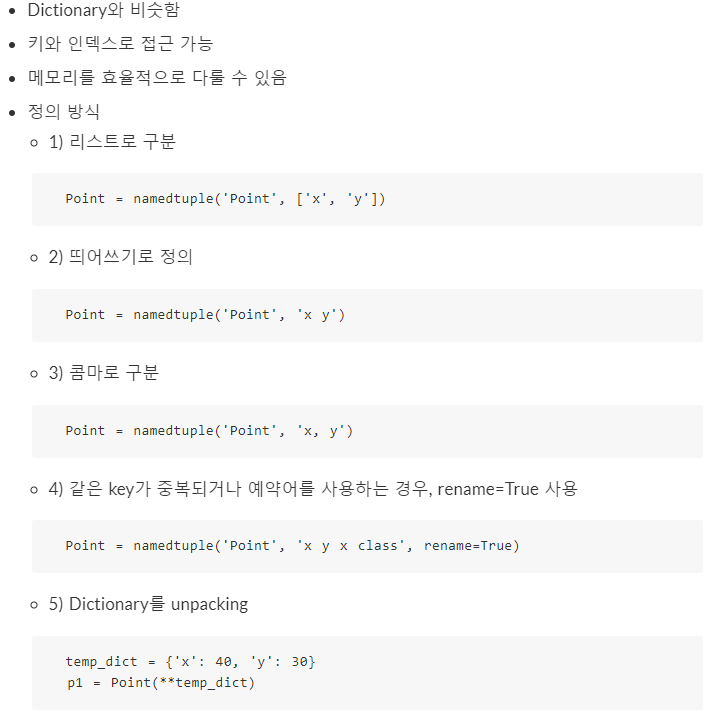

Q Learning의 문제점
* 기존 Q Learning에서는 관측치(St, At, Rt+1, St+1)를 생성하고 바로 Q함수를 업데이트하는 과정을 반복해 학습했지만 다음과 같은 2가지 문제점 있었음
  1. 직전 관측치가 다음 관측치에 영향을 주다보니 학습이 잘 안되는 문제가 있었음
  2. 생성한 관측치는 Q함수 업데이트에 한번 사용되고 버려지기 때문에 데이터에 대한 효율이 낮았음


Experience Replay
* 학습할 때 우리는 눈앞의 경험 뿐만 아니라 관련된 과거의 경험을 상기함. 예를 들어 폭죽에 불을 붙일 때 당장 손에 전해지는 온도도 신경쓰지만, 과거에 불에 데인 경험을 통해 손을 어떻게 보호해야할지 판단하게 됨

* Experience Replay를 사용하는 agent는 관측값을 얻을 때마다 ReplayBuffer에 이를 저장하고, 저장된 history를 샘플링해서 Q함수를 업데이트하는 재료로 사용함으로써, 앞서 설명한 Q Learning의 두가지 문제점을 해결함

* 생성한 관측값을 바로 쓰는 것이 아니라 uniform random sampling을 통해 관측값을 추출하므로, 관측값간의 시간순서가 사라져 상관성 문제에서 자유로워지게 됨

* ReplayBuffer에 관측값을 담아두고 샘플링하기 때문에, 희귀한 샘플이 버려지지 않고 재사용할 수 있음

In [ ]:
# Value Function 을 계산하기 위해서 Nueral Network를 사용
class DQN(nn.Module):

    def __init__(self, h, w):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


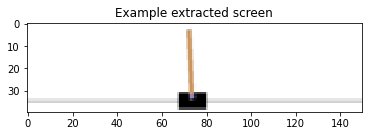

In [ ]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])


# 카트의 위치를 이미지로부터 추정하기 위한 함수
def get_cart_location(screen_width):
    world_width = env.x_threshold *2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 1.0)  # MIDDLE OF CART

# 게임상의 이미지를 얻기 위한 함수
def get_screen():
    # Returned screen requested by gym is 400x600x3, but is sometimes larger
    # such as 800x1200x3. Transpose it into torch order (CHW).
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    # Cart is in the lower half, so strip off the top and bottom of the screen
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 2)
    cart_location = get_cart_location(screen_width)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescale, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)


env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

In [ ]:
BATCH_SIZE = 256
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
init_screen = get_screen()
_, _, screen_height, screen_width = init_screen.shape

policy_net = DQN(screen_height, screen_width).to(device)
target_net = DQN(screen_height, screen_width).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr = 0.001)
memory = ReplayMemory(10000)

steps_done = 0

# 행동을 선택하기 위한 함수
def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    # Epsilon 보다 크면 Value function 에서 행동을 결정 (Exploration)
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1): 각 행의 열에 대해 가장 큰 값을 반환
            return policy_net(state).max(1)[1].view(1, 1)
    else:
    # 아니면 랜덤하게 행동을 결정 (Exploitation)
        return torch.tensor([[random.randrange(2)]], device=device, dtype=torch.long)


episode_durations = []

# Ploting 함수
def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())

    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [ ]:
# 현재 상태에서 어떤 Action을 취했을 때 가장 좋은 결과로 이어질 수 있는 지 그 가치(Value)를 매기기 위한 함수
# 가치를 매기기 위해선 현재의 상태(State)에서 하나의 행동(Action)이 어떤 결과(Next state)로 이어지는지 관찰하고 Value 값을 업데이트
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    # Replay memory 부터 batch size만큼 샘플
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))


    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.uint8)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # 현재 State에 어떠한 Action을 선택했었는지 불러와서 Value 값을 추출
    # Policy net 에서 state 에 따른 value를 얻음
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    next_state_values = torch.zeros(BATCH_SIZE, device=device)

    # Tagetnet 
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    
    # expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Huber Loss
    # Policy Net이 예측한 가치와 실제 Action을 선택한 뒤 미래에 평가했던 가치를 예측하도록 Loss 값을 구성
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

Target Network
하나의 Network를 사용하지 않고 분리된 target network를 둔다는 것은 update를 하는 동안 target을 계산하는 다음의 식에서, 

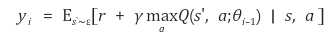

* 계산에 사용되는 parameter를 고정한다는 것을 의미함. 즉, network에 사용되는 parameter들을 θi 라고 할 때(network 상에서의 w나 b등의 model parameter), parameter θ 를 아래 loss function에 의해 update하는 동안 θi-1 은 고정함

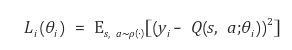









* Target network을 따로 두는(이전 parameter를 고정하는) 이유는, target의 값을 구할 때, 이 parameter의 영향을 크게 받기때문에 보다 안정적으로 계산하기 위함 
* 만약 이렇게 하지 않는다면, target Q value를 구할 때, parameter에 영향을 크게 받아 무한한 feedback loop에 빠지게 되고, estimated Q-value가 target으로 안정적으로 update되지 않을 수 있음 
* 따라서, 우리가 update할 target network의 parameter는 fix하고 update함

Huber Loss

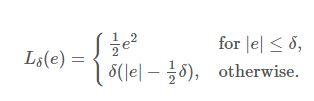

1번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


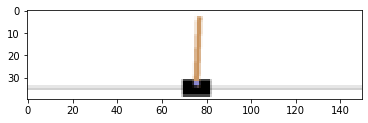

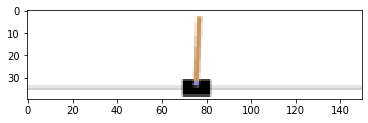

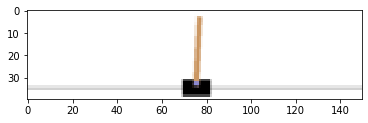

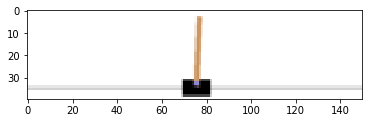

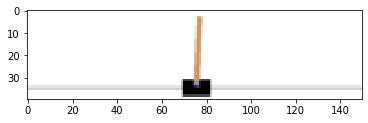

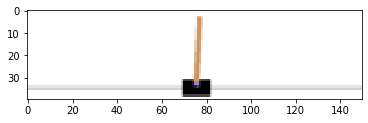

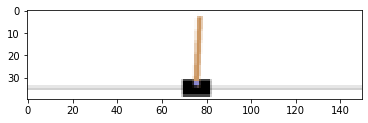

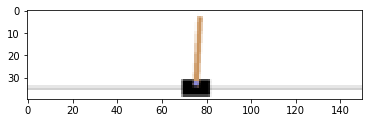

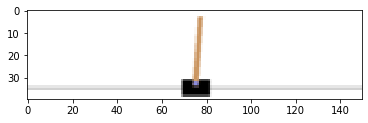

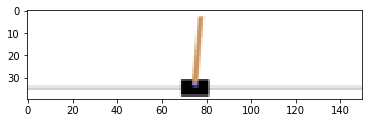

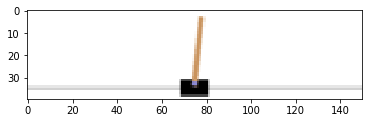

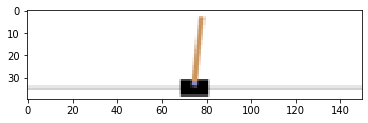

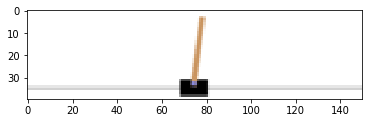

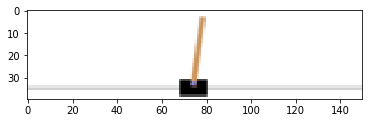

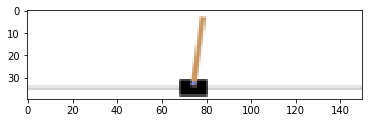

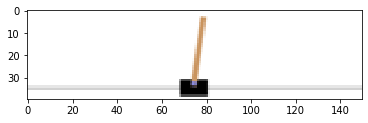

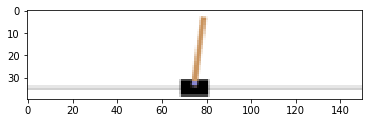

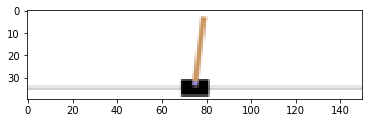

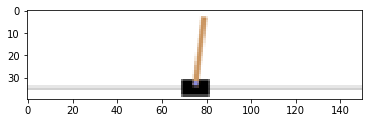

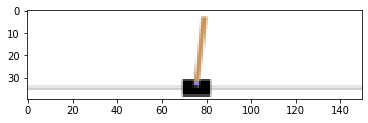

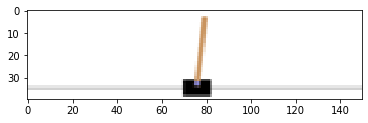

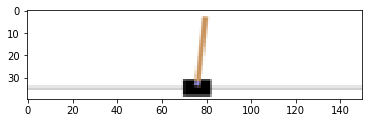

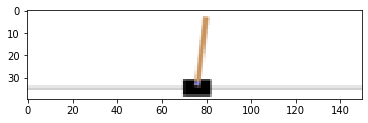

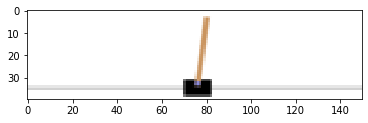

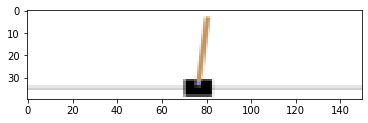

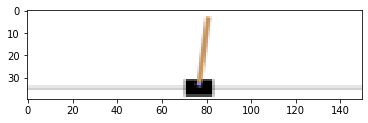

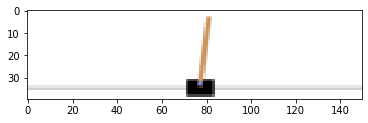

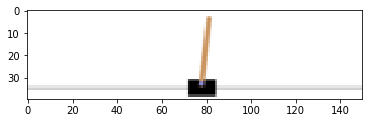

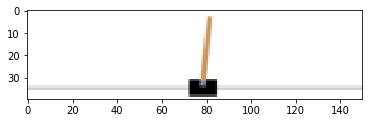

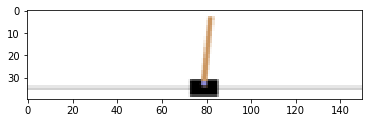

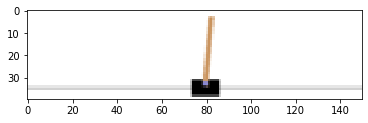

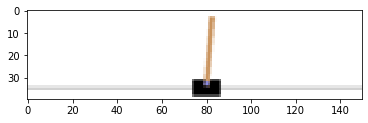

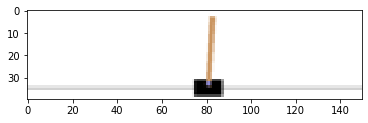

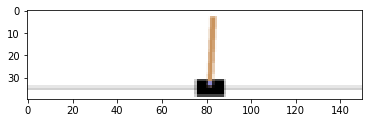

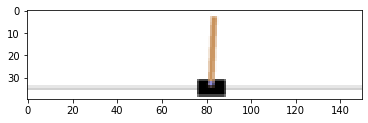

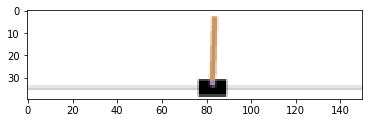

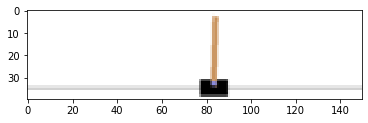

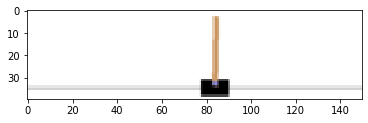

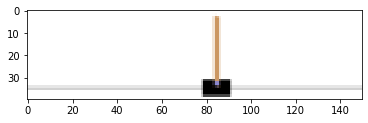

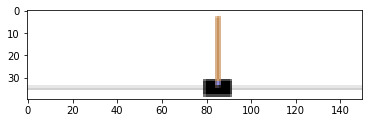

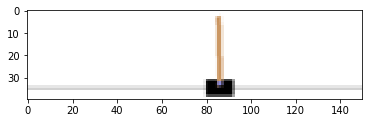

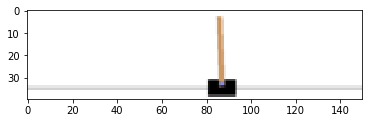

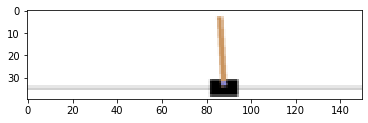

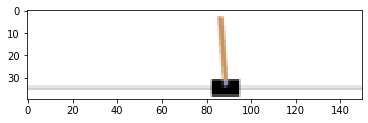

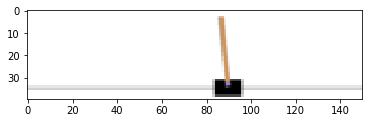

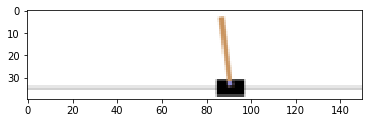

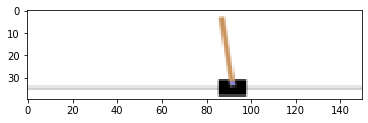

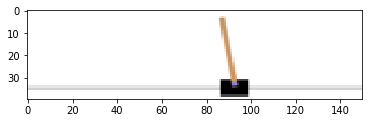

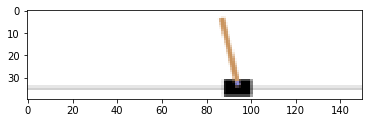

1번째 에피소드 학습 결과: 49번 생존
2번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


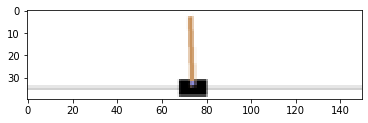

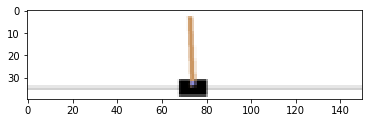

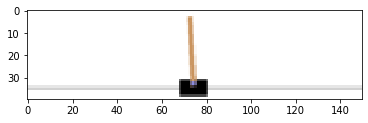

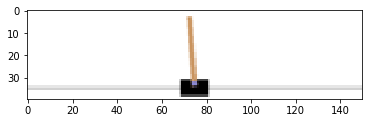

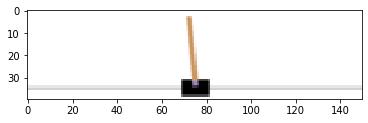

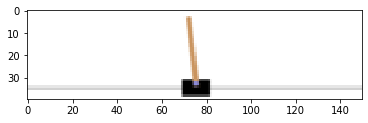

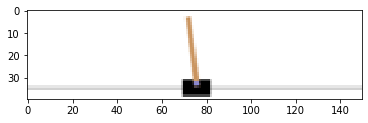

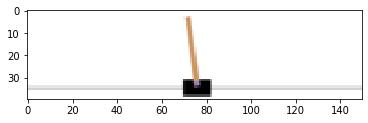

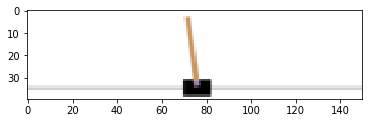

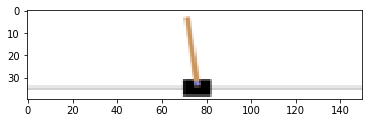

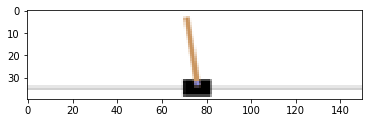

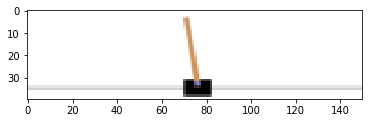

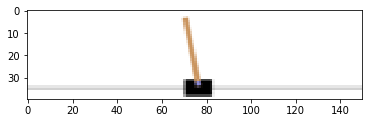

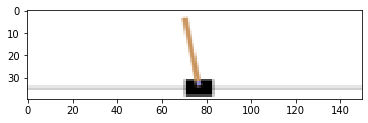

2번째 에피소드 학습 결과: 14번 생존
3번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


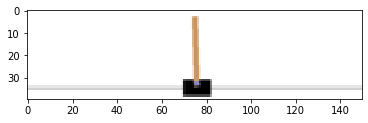

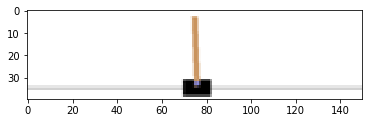

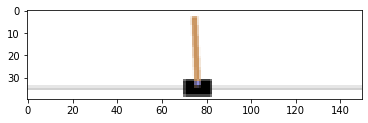

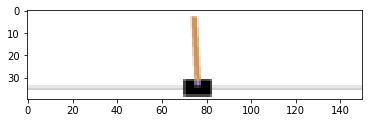

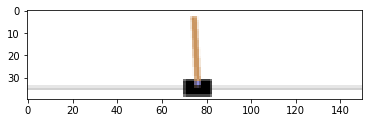

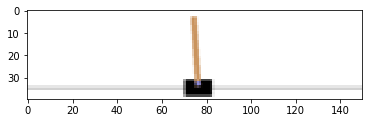

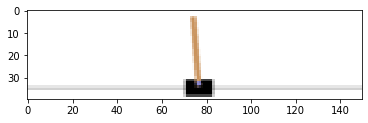

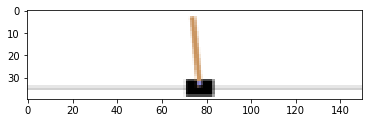

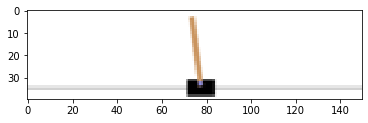

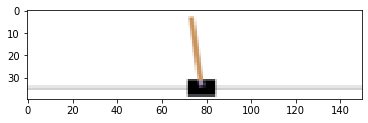

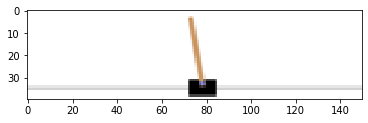

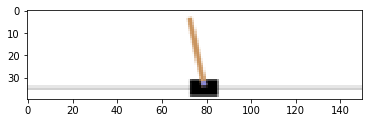

3번째 에피소드 학습 결과: 12번 생존
4번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


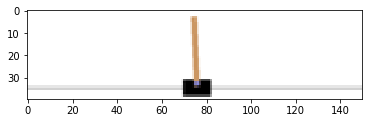

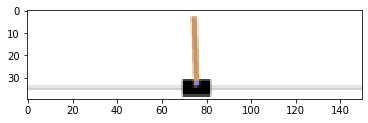

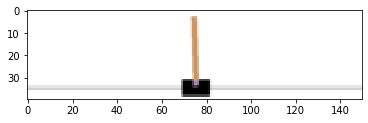

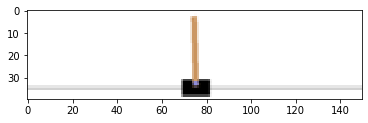

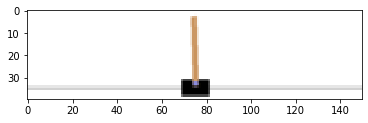

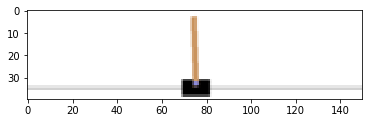

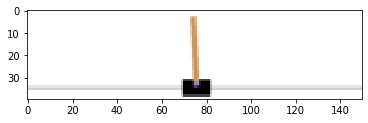

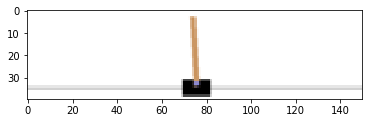

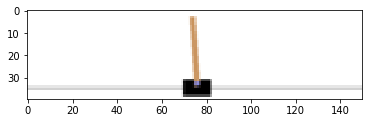

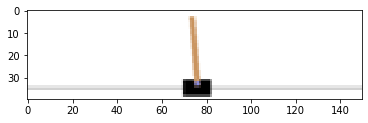

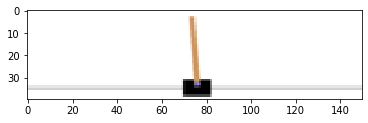

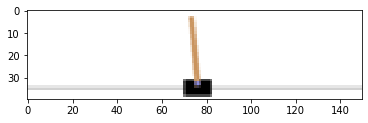

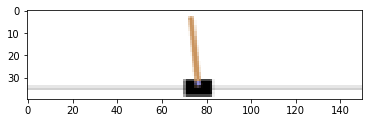

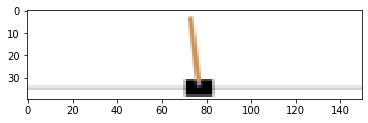

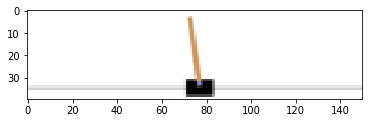

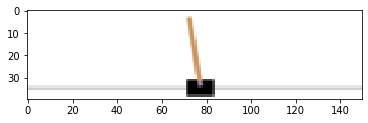

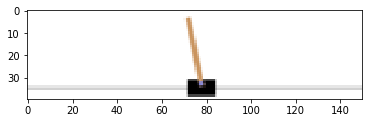

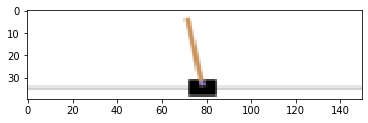

4번째 에피소드 학습 결과: 18번 생존
5번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


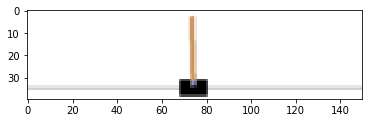

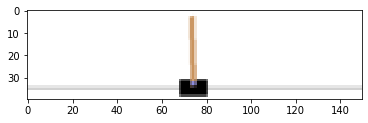

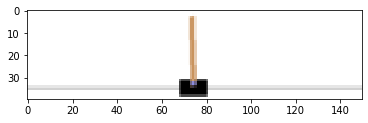

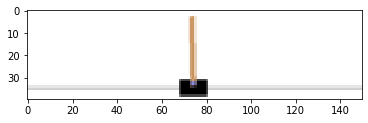

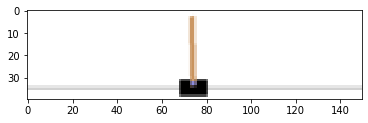

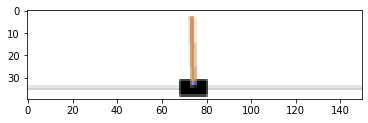

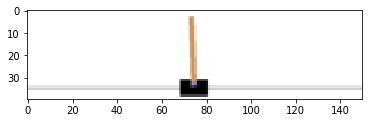

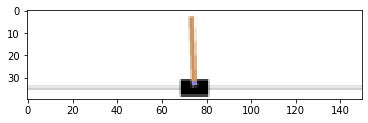

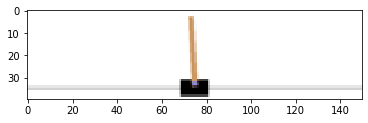

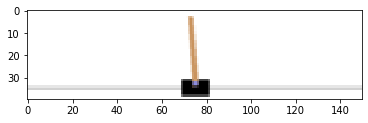

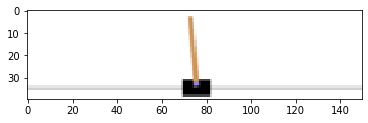

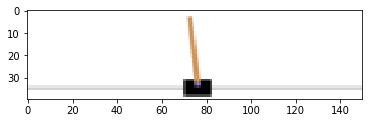

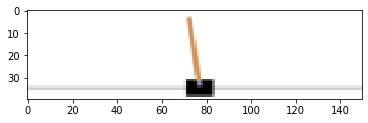

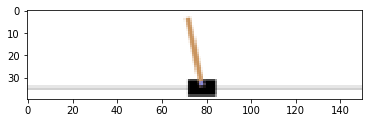

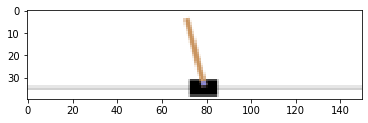

5번째 에피소드 학습 결과: 15번 생존
6번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


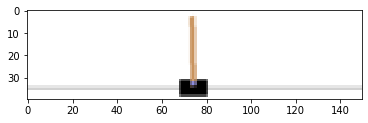

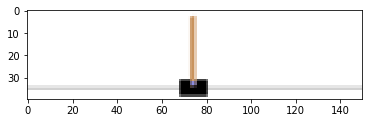

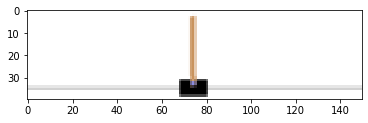

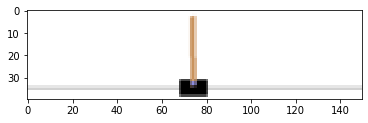

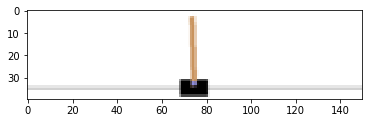

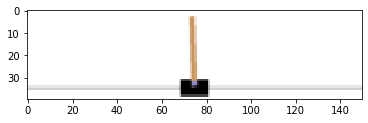

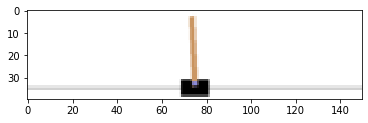

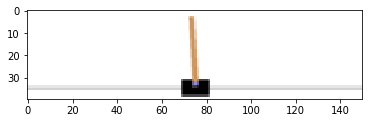

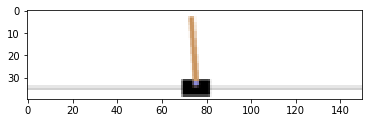

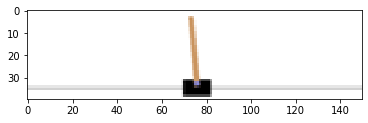

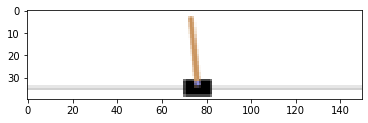

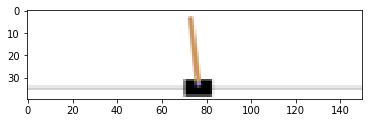

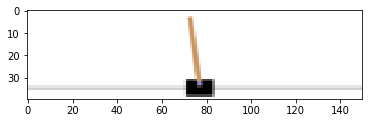

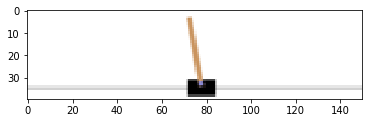

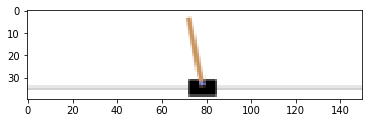

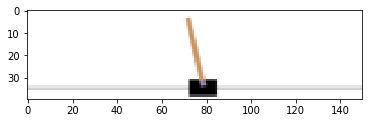

6번째 에피소드 학습 결과: 16번 생존
7번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


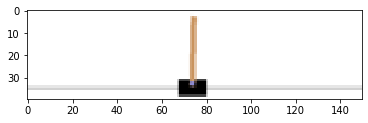

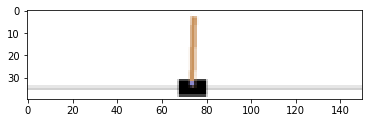

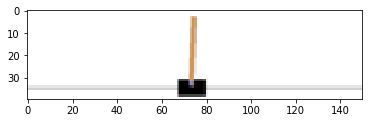

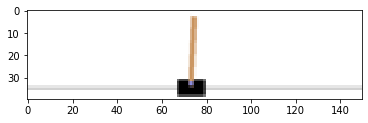

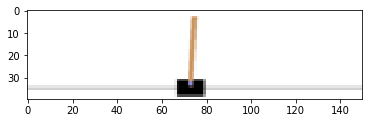

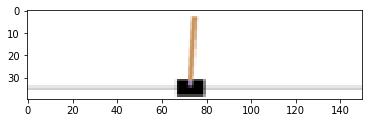

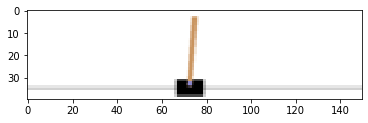

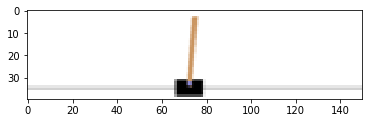

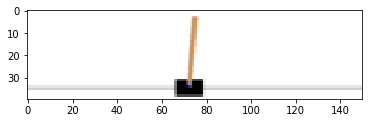

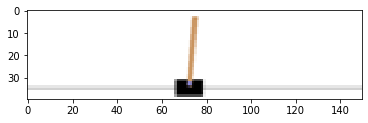

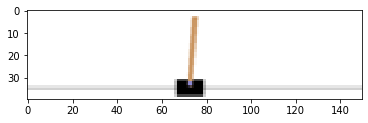

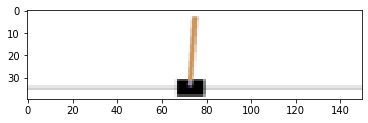

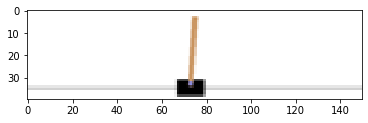

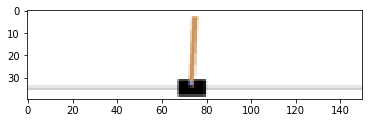

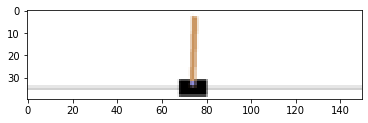

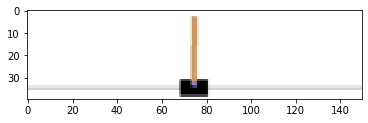

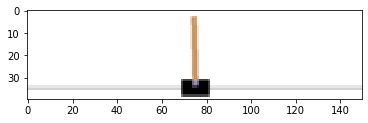

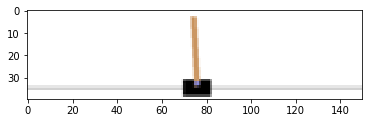

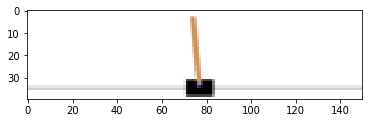

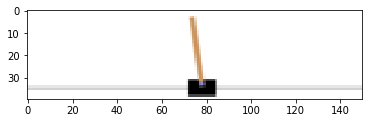

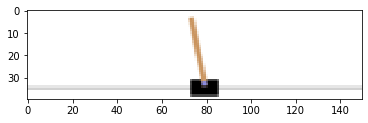

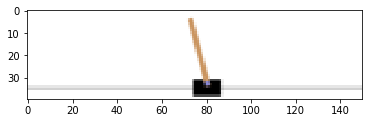

7번째 에피소드 학습 결과: 22번 생존
8번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


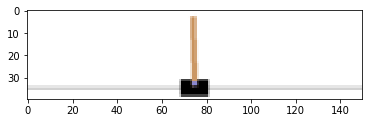

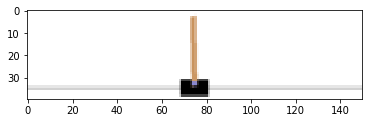

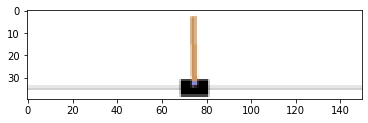

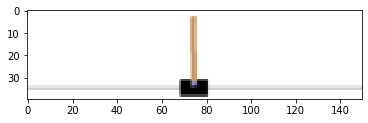

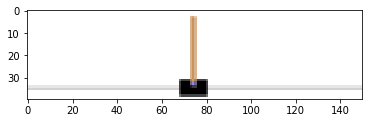

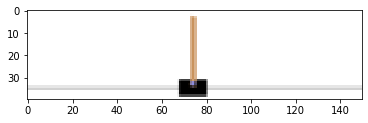

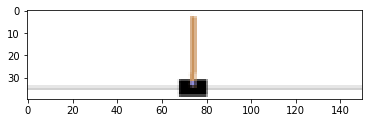

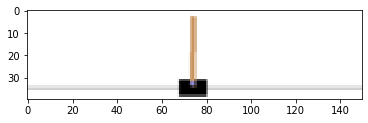

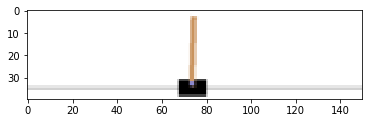

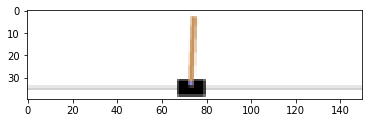

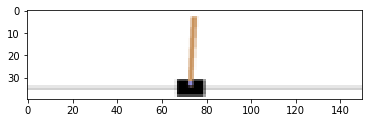

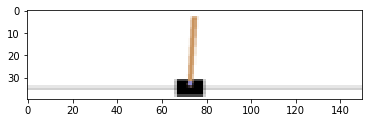

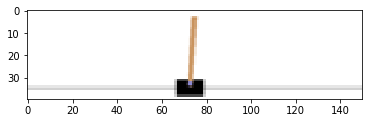

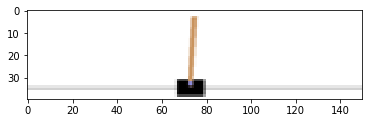

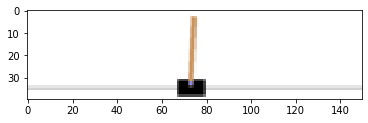

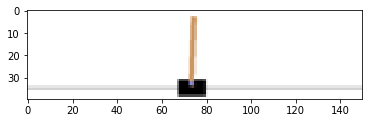

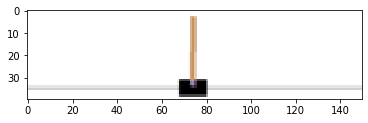

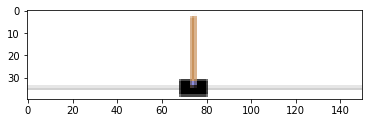

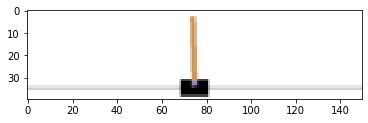

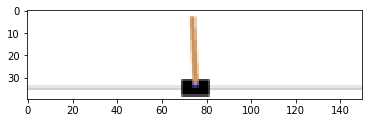

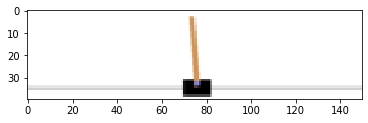

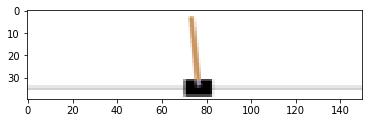

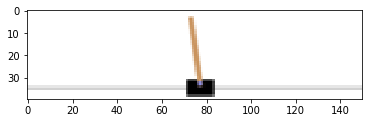

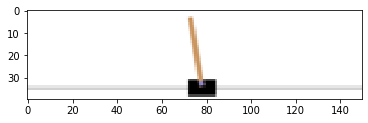

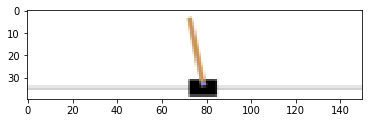

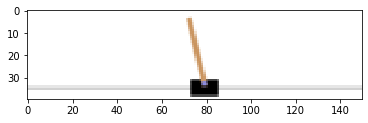

8번째 에피소드 학습 결과: 26번 생존
9번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


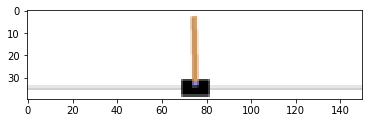

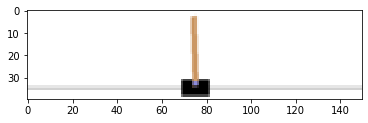

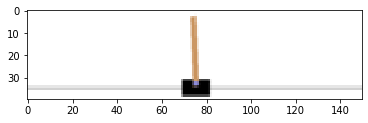

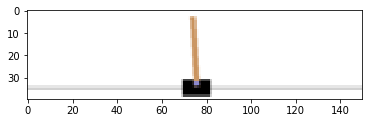

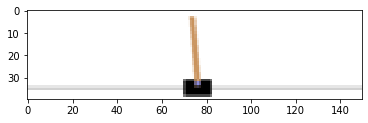

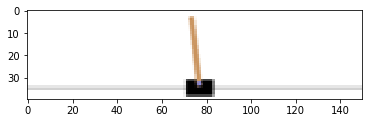

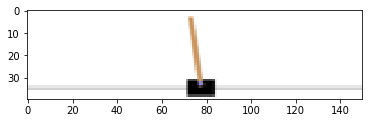

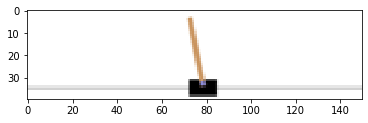

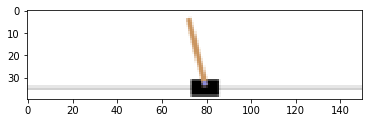

9번째 에피소드 학습 결과: 9번 생존
10번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


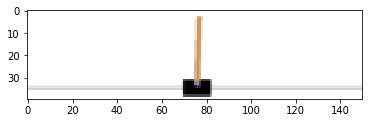

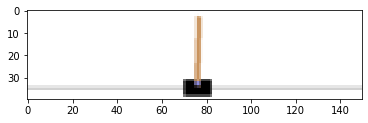

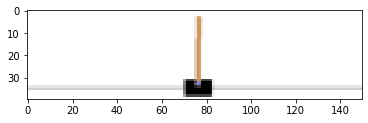

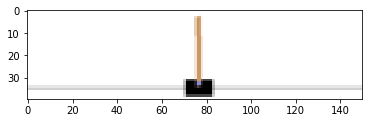

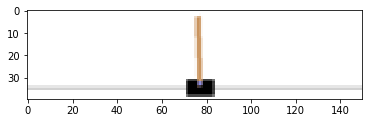

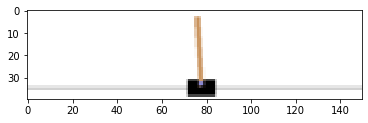

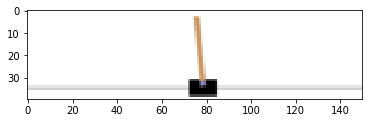

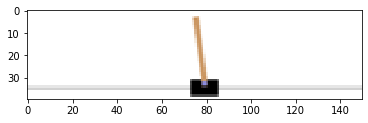

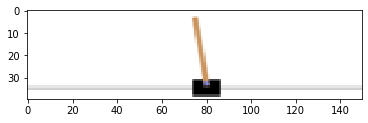

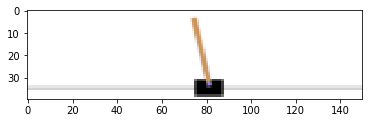

10번째 에피소드 학습 결과: 10번 생존
11번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


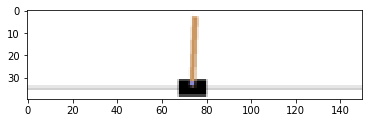

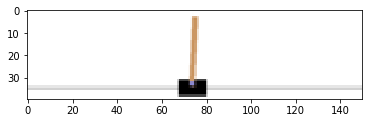

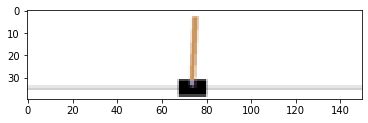

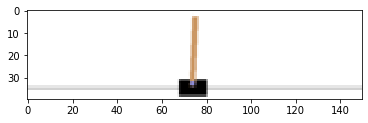

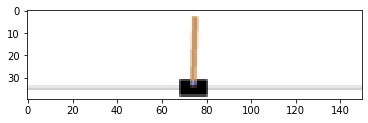

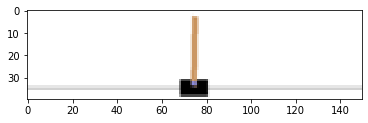

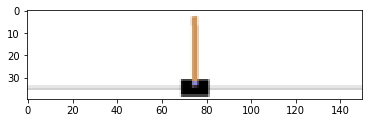

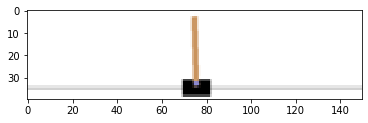

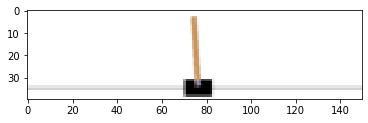

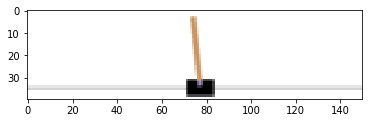

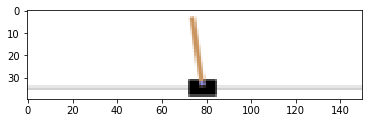

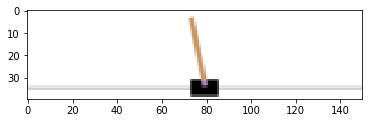

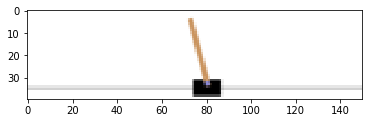

11번째 에피소드 학습 결과: 13번 생존
12번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


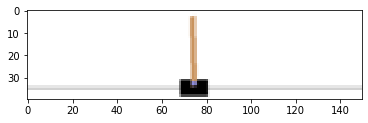

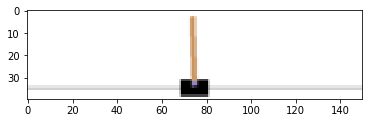

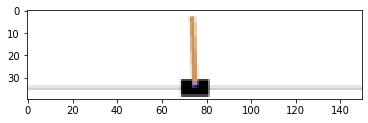

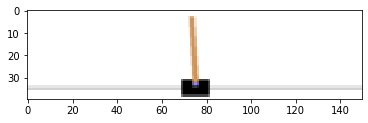

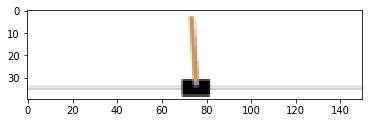

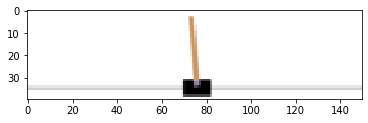

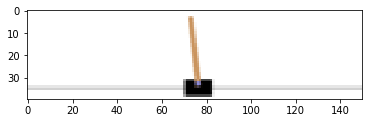

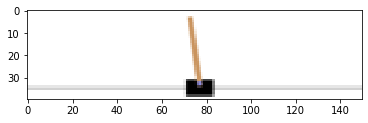

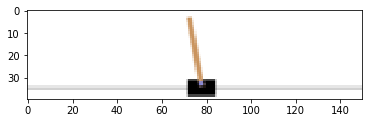

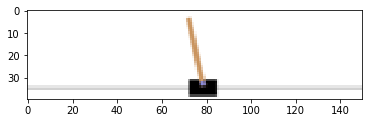

12번째 에피소드 학습 결과: 10번 생존
13번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


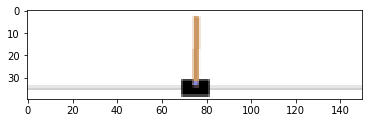

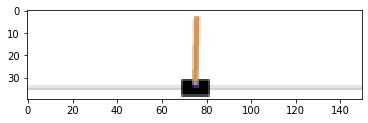

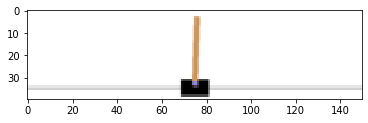

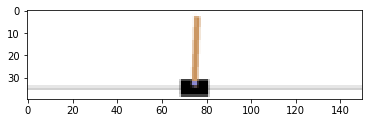

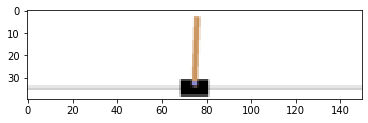

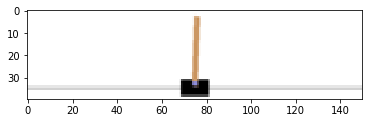

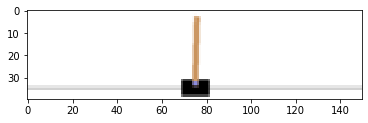

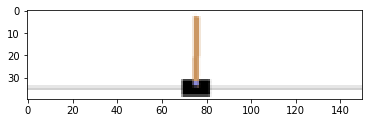

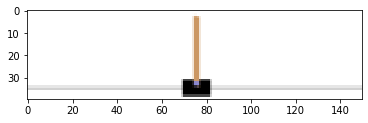

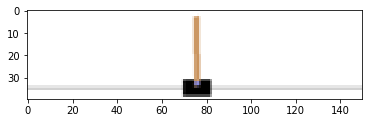

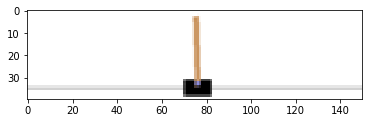

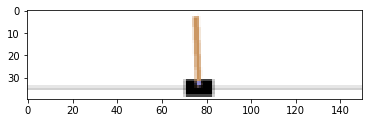

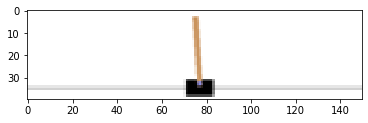

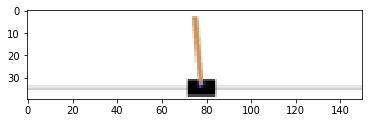

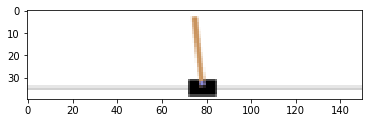

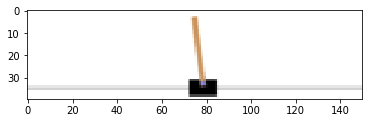

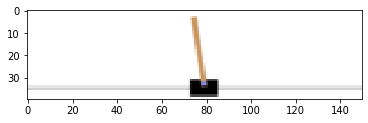

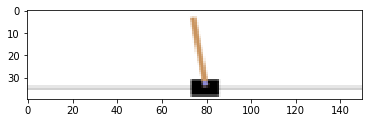

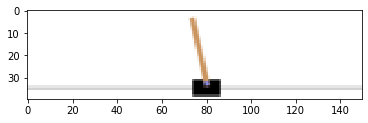

13번째 에피소드 학습 결과: 19번 생존
14번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


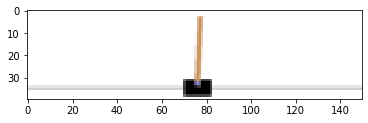

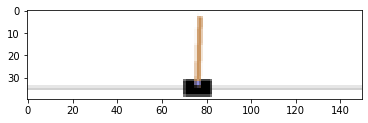

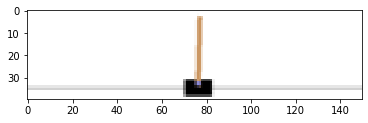

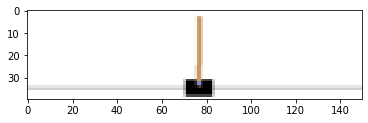

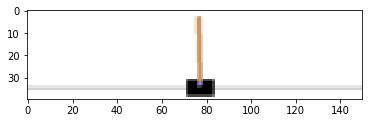

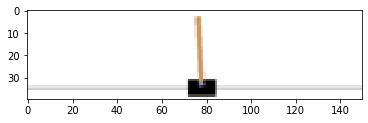

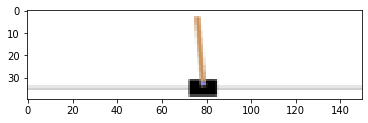

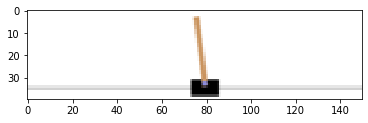

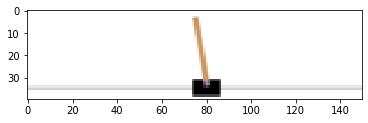

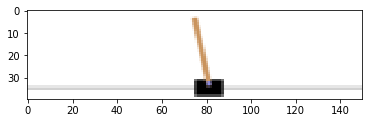

14번째 에피소드 학습 결과: 10번 생존
15번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


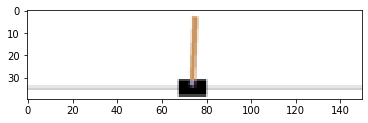

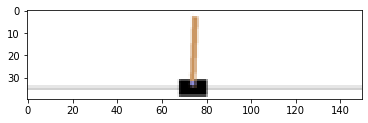

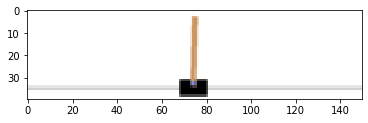

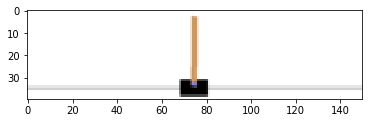

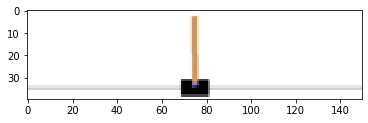

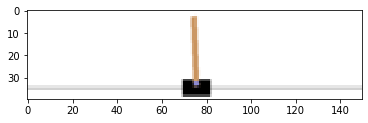

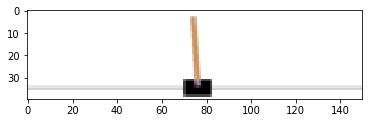

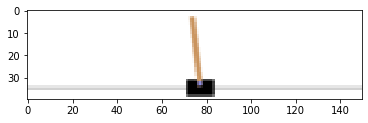

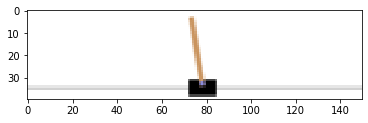

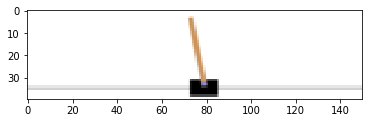

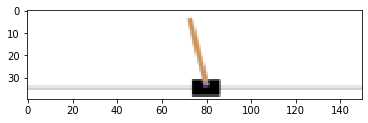

15번째 에피소드 학습 결과: 11번 생존
16번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


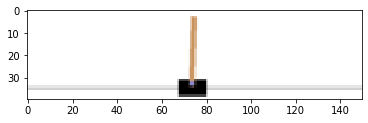

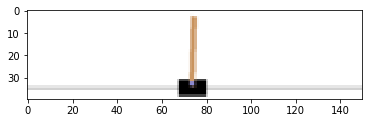

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)


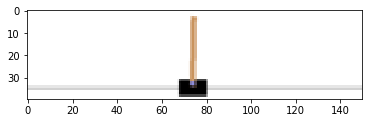

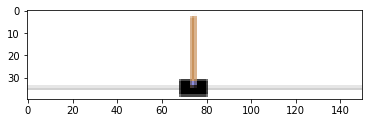

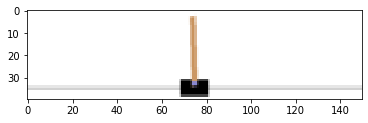

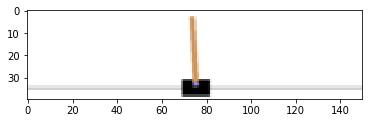

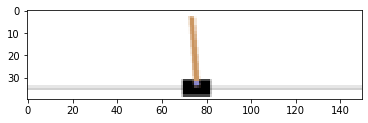

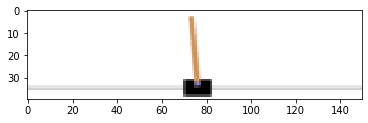

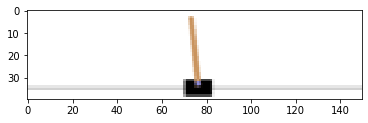

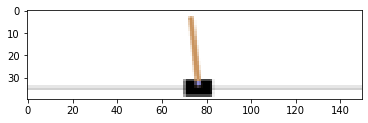

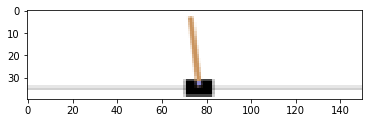

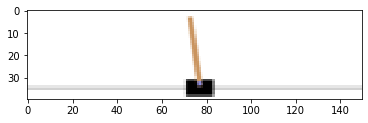

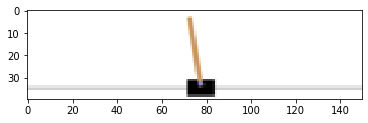

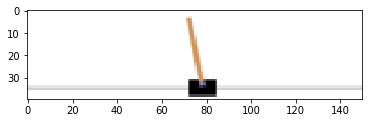

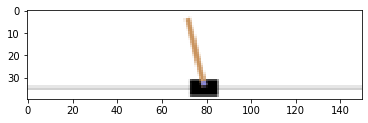

16번째 에피소드 학습 결과: 15번 생존
17번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


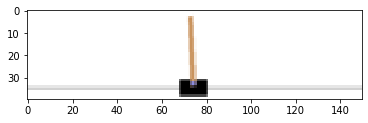

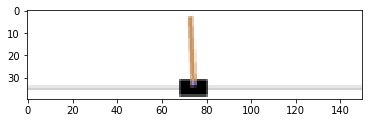

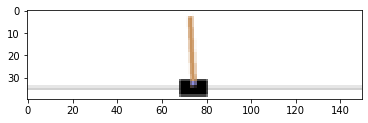

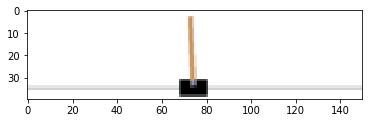

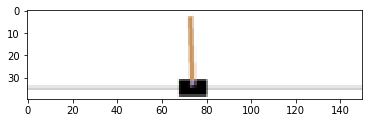

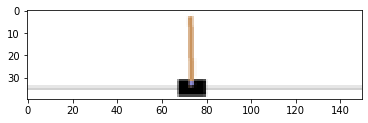

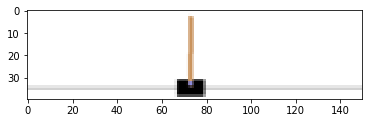

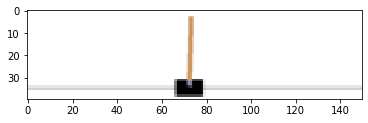

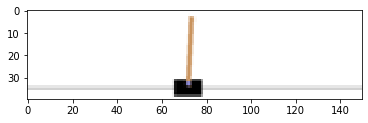

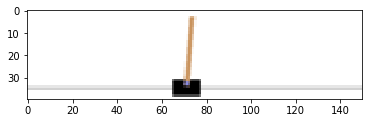

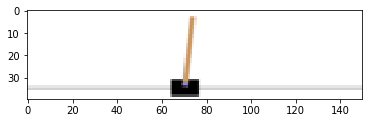

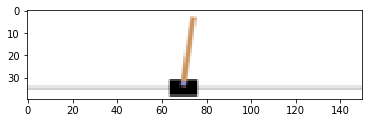

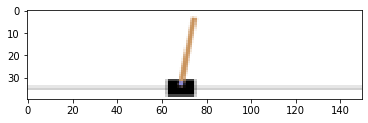

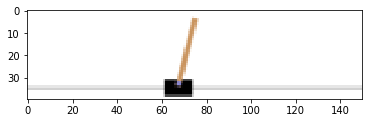

17번째 에피소드 학습 결과: 14번 생존
18번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


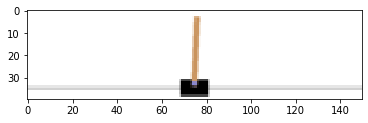

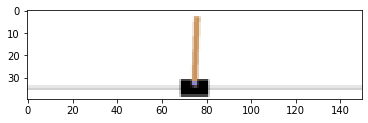

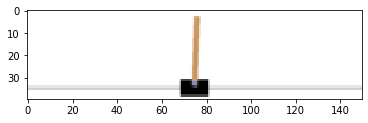

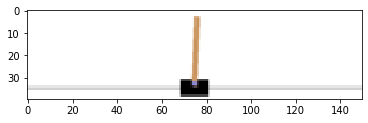

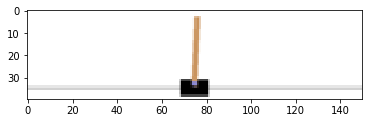

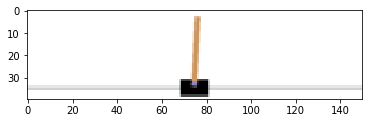

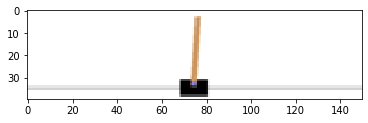

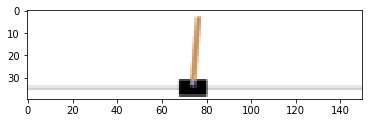

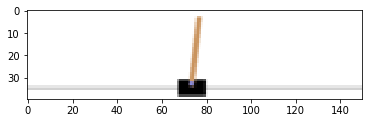

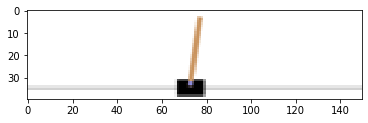

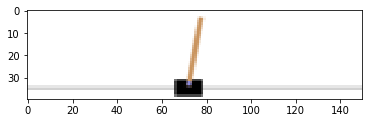

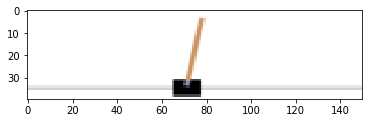

18번째 에피소드 학습 결과: 12번 생존
19번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


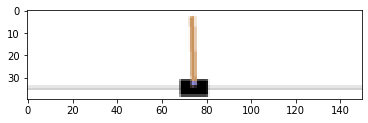

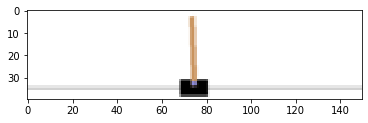

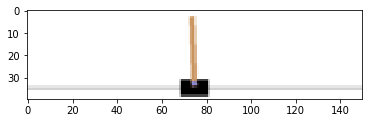

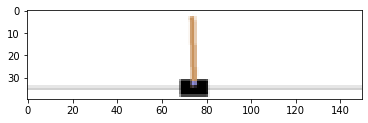

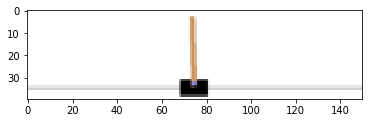

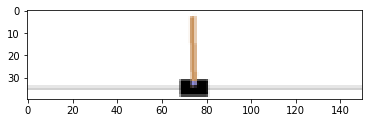

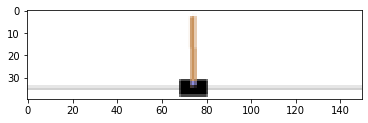

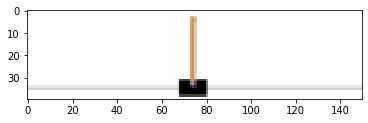

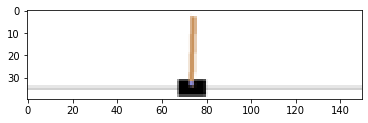

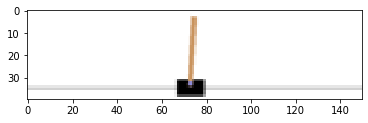

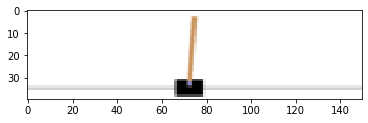

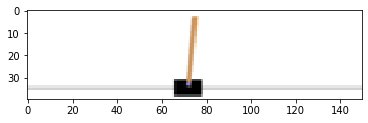

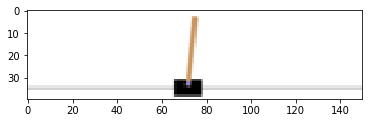

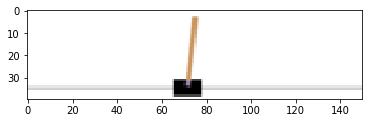

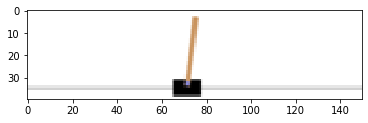

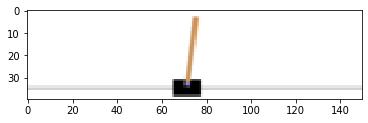

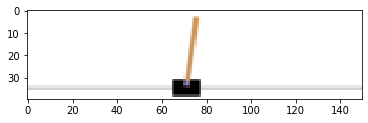

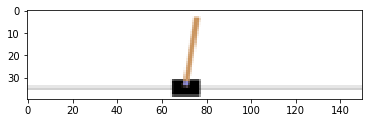

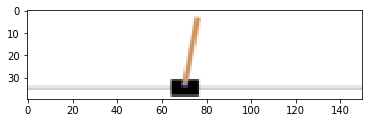

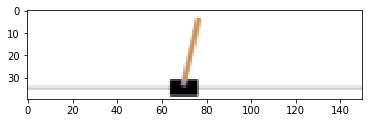

19번째 에피소드 학습 결과: 20번 생존
20번째 에피소드 학습 시작
1초 전 
2초 전 
3초 전 


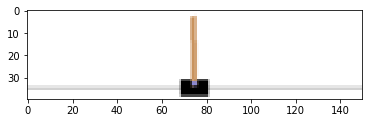

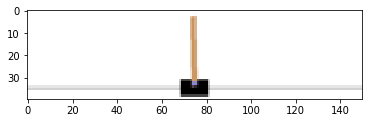

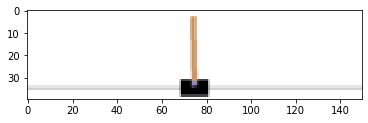

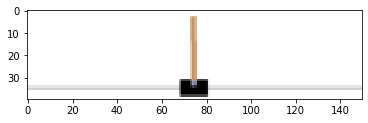

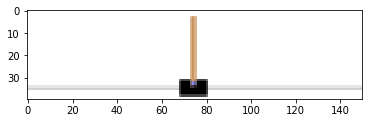

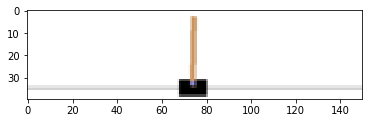

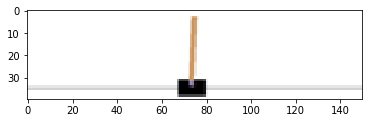

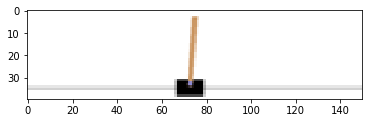

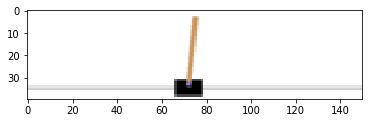

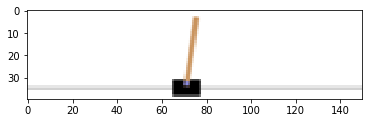

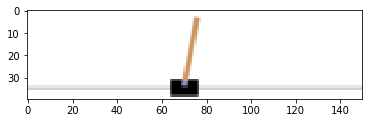

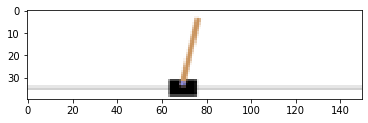

20번째 에피소드 학습 결과: 12번 생존


In [ ]:
torch.manual_seed(10)
num_episodes = 100
max_step = []
for i_episode in range(num_episodes):
    print('{}번째 에피소드 학습 시작'.format(i_episode+1))
    # Initialize the environment and state
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for idx, t in enumerate(count()):

        # Select and perform an action
        action = select_action(state)
        _, reward, done, _, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        if (idx + 1) % 5 == 0:
            plt.figure()
            plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
                    interpolation='none')
            plt.show()

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Optimizating network
        optimize_model()
        
        if done:
            episode_durations.append(t + 1)
            #plot_durations()
            break
        
    print('{}번째 에피소드 학습 결과: {}번 생존'.format(i_episode+1,idx+1))
    max_step.append(idx+1)

    # Update the target network
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())


# 구현 결과 시각화

In [ ]:
from gym.wrappers.record_video import RecordVideo

import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
    with open('./video/rl-video-episode-0.mp4', 'r+b') as f:
        video = f.read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="Trained CartPole" autoplay 
                loop style="height: 200px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    
def wrap_env(env):
    env = RecordVideo(env, './video')
    return env

In [ ]:
num_state = env.observation_space.shape[0]
env = wrap_env(gym.make('CartPole-v1'))
state = env.reset()
done = False

mem = []

while not done:    
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    q_value = policy_net(state)
    mem.append(q_value[0].detach().cpu().numpy())
    action = np.argmax(q_value[0].detach().cpu().numpy())
    state, reward, done, info = env.step(action)

env.close()

show_video()